In [1]:
import xarray as xr
import src.Teleconnection.tools as tools
import src.composite.field_composite as composite

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt
import cartopy.crs as ccrs

In [3]:
import src.plots.utils as utils
import matplotlib as mpl
import src.plots.composite_spatial_pattern as composite_plots

# Read Data

The data to be averaged

In [4]:
# %%
print("reading data...")
# data
allens = xr.open_dataset(
    "/work/mh0033/m300883/transition/gr19/gphSeason/allens_season_time.nc"
)
# split ens
splitens = tools.split_ens(allens)

# demean ens-mean
demean = splitens - splitens.mean(dim="ens")

# select traposphere
trop = demean.sel(hlayers=slice(20000, 100000))

trop = trop.var156


reading data...


## Pre-process the field data

standardize

In [5]:
trop = tools.standardize(trop)

## The index as the conditions

In [7]:
def read_index(std_type):
    """read index_dynamical_spatial_patterns"""
    odir = '/work/mh0033/m300883/3rdPanel/data/first_last/dep/'
    std = std_type
    fpath_first10_first = odir+std+"/first10_first.nc"
    fpath_last10_last = odir+std+"/last10_last.nc"
    first10_first = xr.open_dataset(fpath_first10_first)
    last10_last = xr.open_dataset(fpath_last10_last)
    first10_first = first10_first.pc
    last10_last = last10_last.pc
    return first10_first, last10_last

In [8]:
first_index, last_index = read_index("std_self")

## Composite 

In [9]:
first_sptial_pattern = composite.Tel_field_composite(first_index,trop)

In [10]:
last_sptial_pattern = composite.Tel_field_composite(last_index,trop)

## show spatial maps

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


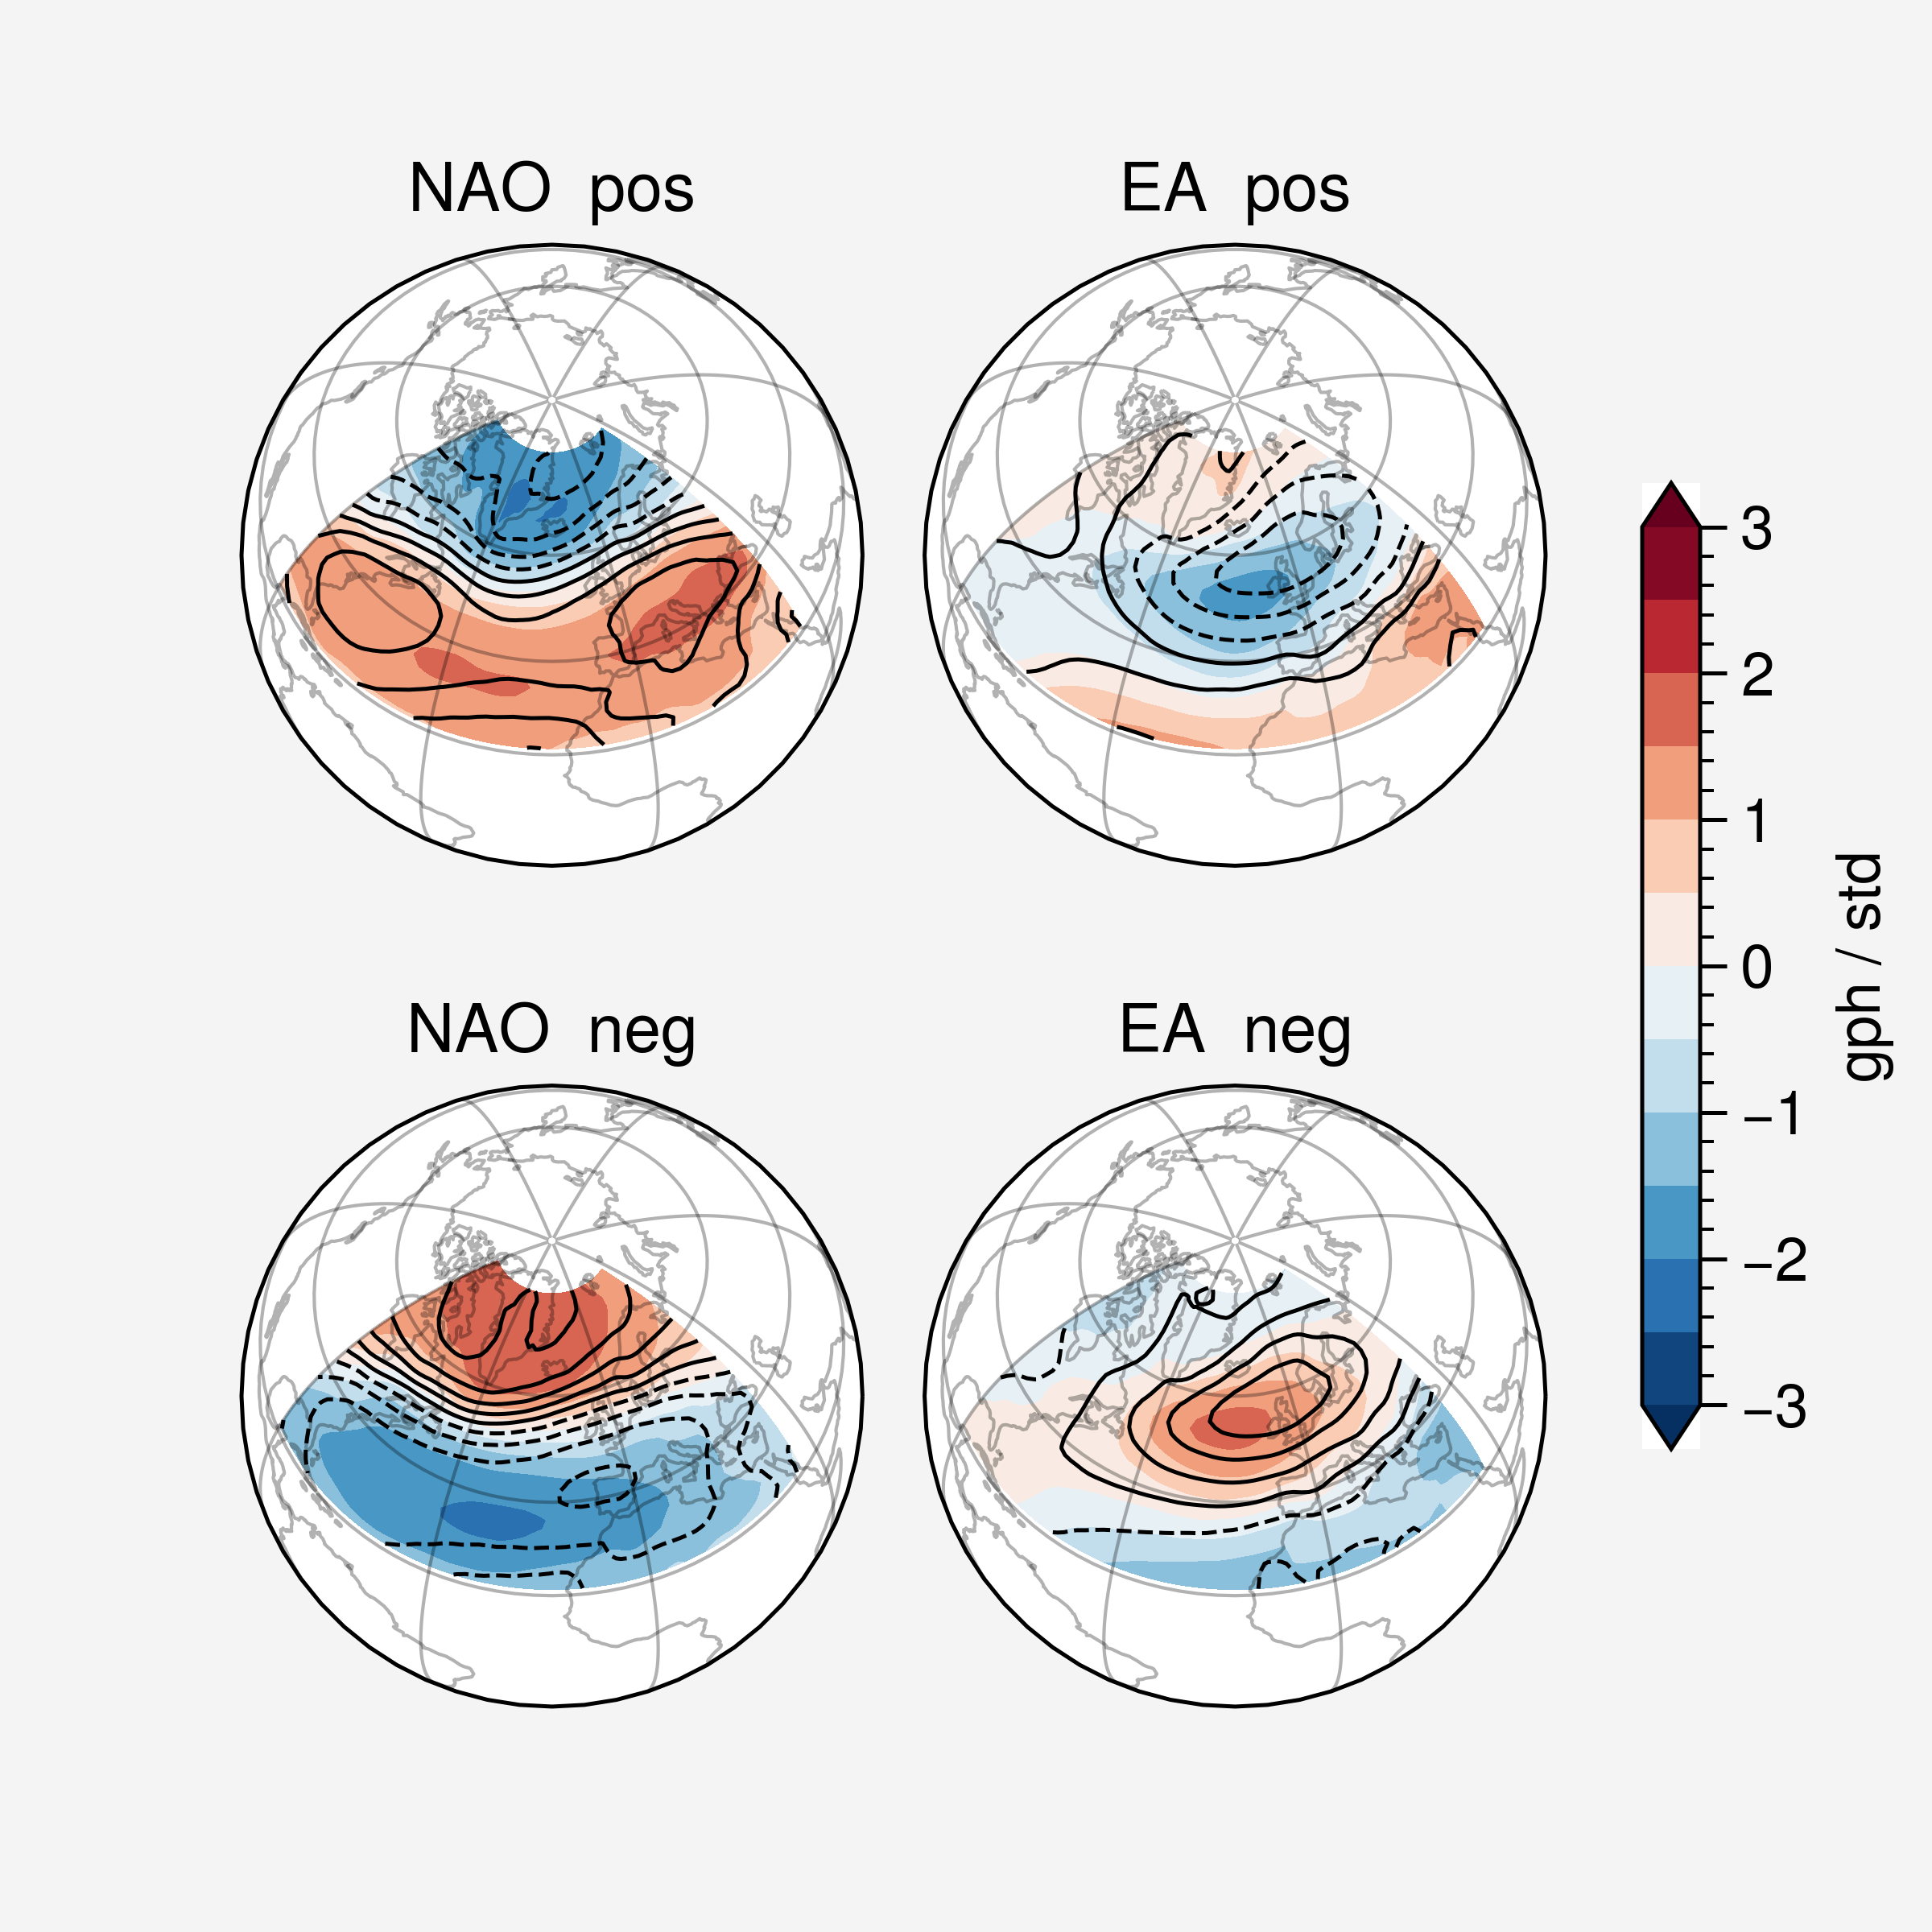

In [11]:
composite_plots.composite_gph(first_sptial_pattern, last_sptial_pattern, levels = np.arange(-3,3.1,0.5), hlayers=100000)

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


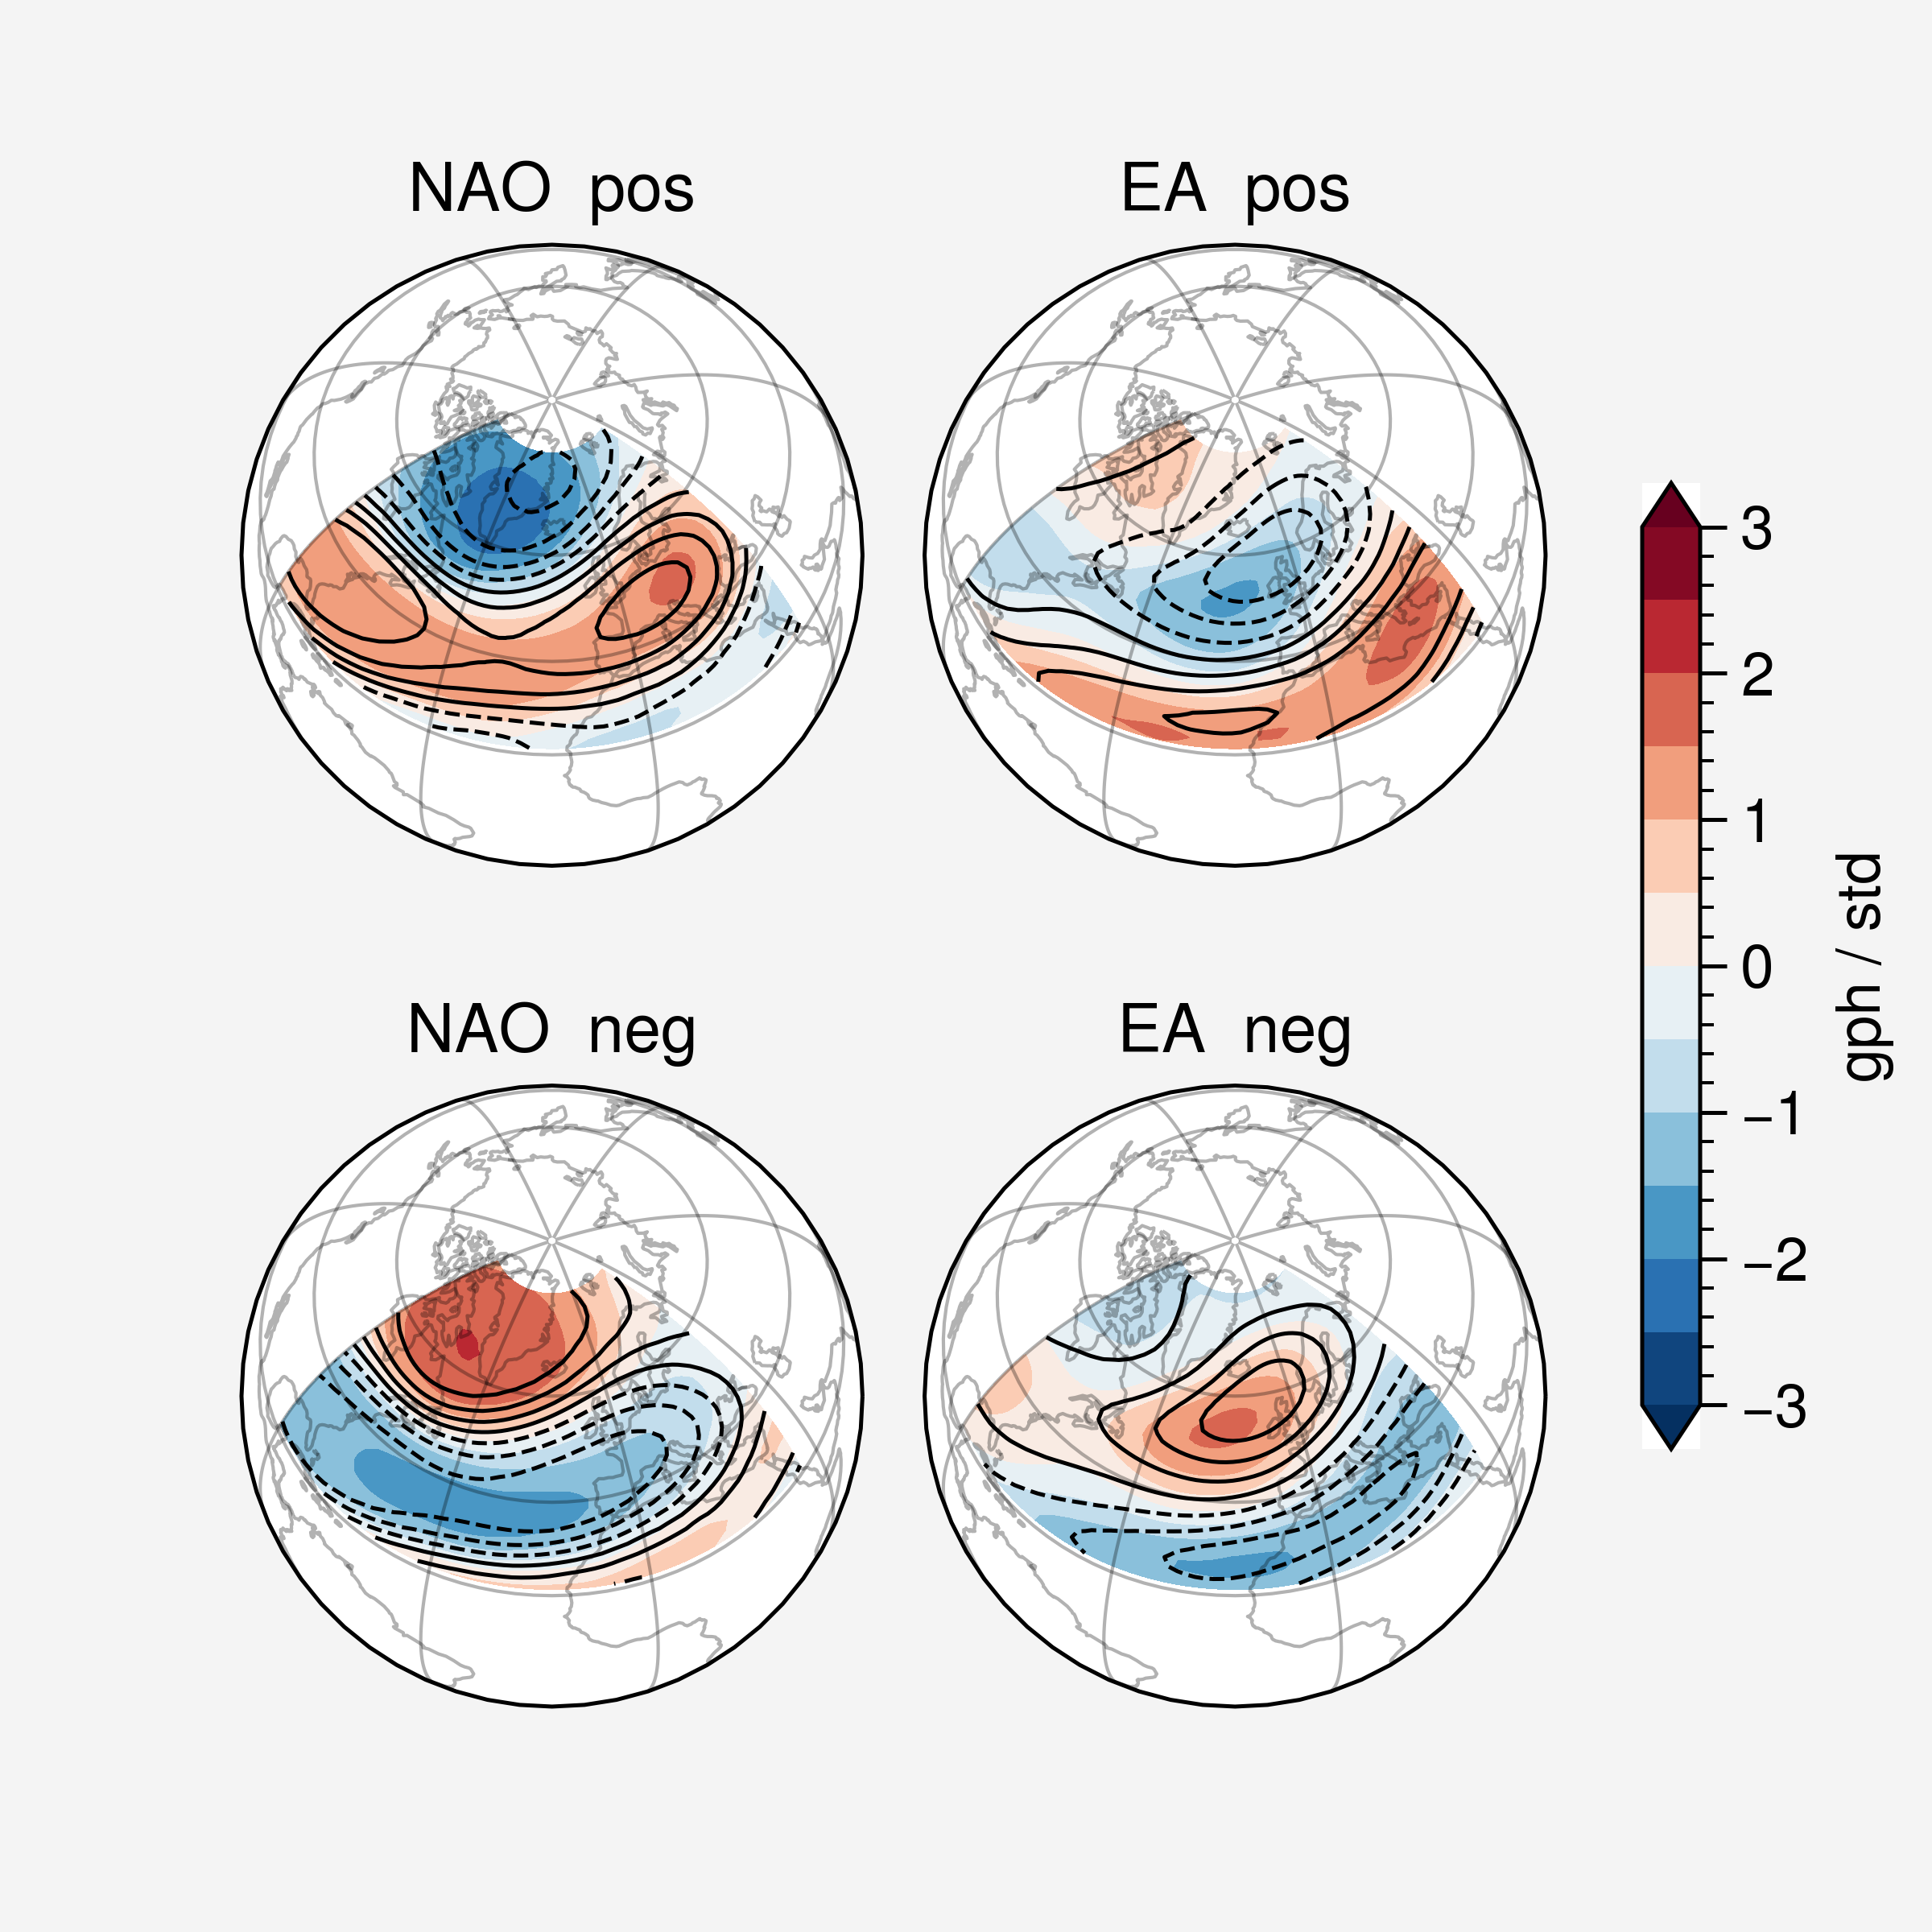

In [12]:
composite_plots.composite_gph(first_sptial_pattern, last_sptial_pattern, levels = np.arange(-3,3.1,0.5), hlayers=50000)

# Vertical section

In [13]:
import src.Teleconnection.pattern_statistic as pattern_stat

In [14]:
first_sptial_pattern

<xarray.DataArray 'var156' (hlayers: 11, mode: 2, extr_type: 2, lat: 32, lon: 70)>
array([[[[[-1.5486884 , -1.5704206 , -1.5918596 , ..., -0.8453107 ,
           -0.8284616 , -0.81338906],
          [-1.5747616 , -1.6018608 , -1.6286734 , ..., -0.6865821 ,
           -0.667868  , -0.65157044],
          [-1.5836893 , -1.616383  , -1.6486233 , ..., -0.5114947 ,
           -0.49239513, -0.4763652 ],
          ...,
          [ 0.78817886,  0.7720482 ,  0.75232065, ...,  0.13729665,
            0.14532915,  0.1526783 ],
          [ 0.61978227,  0.59583503,  0.5696369 , ...,  0.24422231,
            0.25451207,  0.26179948],
          [ 0.42412856,  0.39625084,  0.36680368, ...,  0.3215784 ,
            0.33382404,  0.34070802]],

         [[ 1.2087919 ,  1.226681  ,  1.2438604 , ...,  0.5439321 ,
            0.5354306 ,  0.5284124 ],
          [ 1.2696849 ,  1.2915158 ,  1.3123512 , ...,  0.43424815,
            0.42372575,  0.41519192],
          [ 1.3219156 ,  1.3474296 ,  1.3716972 , ...,  0.32375842,
            0.31164563,  0.30193526],
...
          [-0.34398523, -0.3860988 , -0.41971937, ...,  1.0795224 ,
            1.1741061 ,  1.2592627 ],
          [-0.3469082 , -0.375208  , -0.40666834, ...,  1.0322807 ,
            1.1021247 ,  1.1950513 ],
          [-0.35649958, -0.37724835, -0.3970098 , ...,  1.1177652 ,
            1.1672802 ,  1.2239187 ]],

         [[-0.45890903, -0.45315346, -0.4464131 , ..., -0.5089384 ,
           -0.509279  , -0.510038  ],
          [-0.47887528, -0.47143888, -0.46164778, ..., -0.44871187,
           -0.45099008, -0.4532566 ],
          [-0.5084288 , -0.5028645 , -0.49363858, ..., -0.37216505,
           -0.3766343 , -0.38076654],
          ...,
          [ 0.15039644,  0.23931564,  0.30914375, ..., -1.0407574 ,
           -1.1362948 , -1.242007  ],
          [ 0.15271078,  0.2315856 ,  0.30369174, ..., -0.96850955,
           -1.0314199 , -1.1063037 ],
          [ 0.14222164,  0.21643916,  0.27926245, ..., -0.9879872 ,
           -1.0220084 , -1.063993  ]]]]], dtype=float32)
Coordinates:
  * lon        (lon) float64 -90.0 -88.12 -86.25 -84.38 ... 35.62 37.5 39.38
  * lat        (lat) float64 79.27 77.41 75.54 73.68 ... 27.05 25.18 23.32 21.45
  * hlayers    (hlayers) float64 2e+04 2.5e+04 3e+04 ... 8.5e+04 9.25e+04 1e+05
  * mode       (mode) object 'NAO' 'EA'
  * extr_type  (extr_type) <U3 'pos' 'neg'

In [15]:
first_NAO_lat_height = pattern_stat.lat_height(first_sptial_pattern,mode = 'NAO')
last_NAO_lat_height = pattern_stat.lat_height(last_sptial_pattern,mode = 'NAO')

In [16]:
first_EA_lon_height = pattern_stat.lon_height(first_sptial_pattern,mode = 'EA')
last_EA_lon_height = pattern_stat.lon_height(last_sptial_pattern,mode = 'EA')

/tmp/ipykernel_486417/2615481552.py:14: ProplotWarning: Got conflicting or duplicate keyword args: {'x_positional': <xarray.DataArray 'var156' (hlayers: 11, lat: 32)>
array([[-1.5166241 , -1.5320312 , -1.5308582 , -1.5101341 , -1.466629  ,
        -1.3996737 , -1.3087945 , -1.1939132 , -1.0566299 , -0.8971036 ,
        -0.71523064, -0.5134794 , -0.2938909 , -0.05833232,  0.18973607,
         0.44257692,  0.6819125 ,  0.88124365,  1.0208989 ,  1.0959114 ,
         1.11261   ,  1.0802516 ,  1.0070419 ,  0.8978589 ,  0.75648254,
         0.589448  ,  0.4076066 ,  0.2274406 ,  0.06564111, -0.06474739,
        -0.15657362, -0.2077909 ],
       [-1.398402  , -1.4390749 , -1.4638097 , -1.4666177 , -1.4440817 ,
        -1.3947935 , -1.3185228 , -1.2196816 , -1.0966173 , -0.949641  ,
        -0.77822524, -0.58484983, -0.37179744, -0.14102738,  0.10473016,
         0.35905683,  0.6039609 ,  0.811923  ,  0.9608653 ,  1.042919  ,
         1.0631771 ,  1.0331526 ,  0.9628834 ,  0.8567272 ,  0.72205

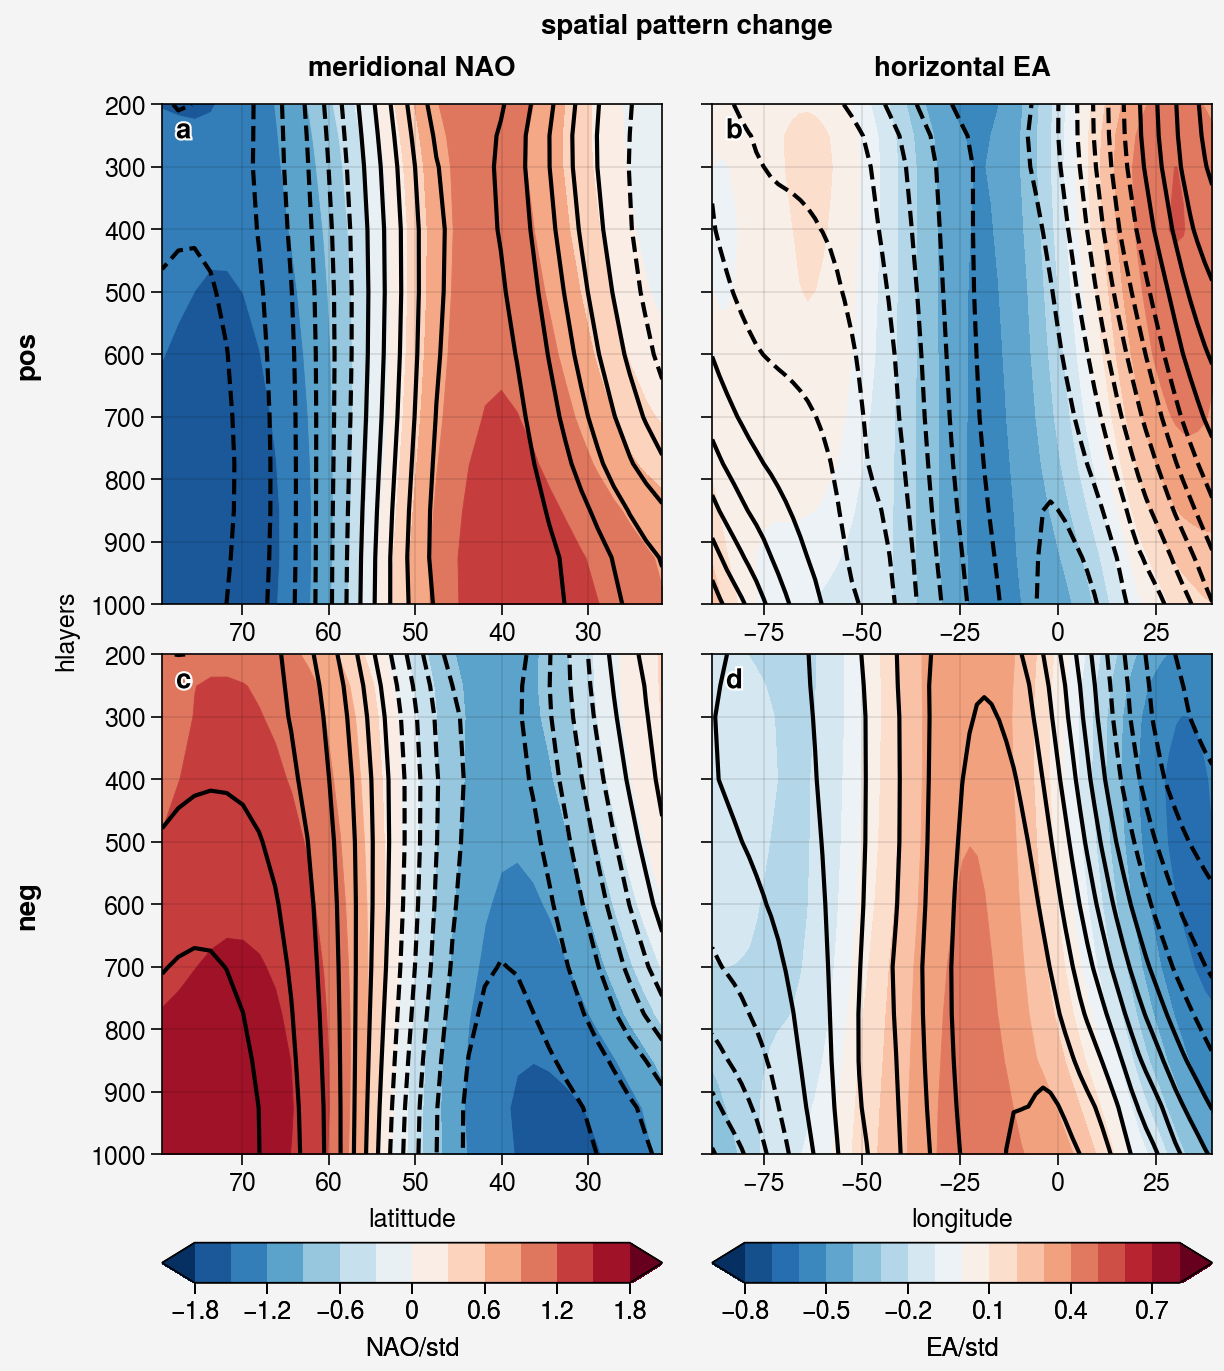

In [17]:
fig, axes = pplt.subplots(nrows = 2,ncols = 2,wspace = 2, hspace = 2,sharex = False)
axes.format(
    abc = 'a',
    abcloc = 'ul',
    xminorlocator = 'null',
    yminorlocator = 'null',
    suptitle = f"spatial pattern change",
    yreverse = True,
    xreverse = False,
    toplabels = ("meridional NAO","horizontal EA"),
    leftlabels = ("pos","neg"),
)

axes[0,0].contourf(first_NAO_lat_height.sel(extr_type = 'pos'),x = 'lat',y = 'hlayers', levels = np.arange(-1.8,1.9,0.3),extend = 'both', )
NAO_map = axes[1,0].contourf(first_NAO_lat_height.sel(extr_type = 'neg'),x = 'lat',y = 'hlayers', levels = np.arange(-1.8,1.9,0.3),extend = 'both', )

axes[0,0].contour(last_NAO_lat_height.sel(extr_type = 'pos'), x = 'lat',y = 'hlayers', levels = np.arange(-1.8,1.9,0.3),extend = 'both', colors = 'k')
axes[1,0].contour(last_NAO_lat_height.sel(extr_type = 'neg'), x = 'lat',y = 'hlayers', levels = np.arange(-1.8,1.9,0.3),extend = 'both', colors = 'k')

axes[0,1].contourf(first_EA_lon_height.sel(extr_type = 'pos'),x = 'lat',y = 'hlayers', levels = np.arange(-0.8,0.9,0.1),extend = 'both', )
EA_map = axes[1,1].contourf(first_EA_lon_height.sel(extr_type = 'neg'),x = 'lat',y = 'hlayers', levels = np.arange(-0.8,0.9,0.1),extend = 'both', )

axes[0,1].contour(last_EA_lon_height.sel(extr_type = 'pos'), x = 'lat',y = 'hlayers', levels = np.arange(-0.8,0.9,0.1),extend = 'both', colors = 'k')
axes[1,1].contour(last_EA_lon_height.sel(extr_type = 'neg'), x = 'lat',y = 'hlayers', levels = np.arange(-0.8,0.9,0.1),extend = 'both', colors = 'k')

axes[1,0].format(xlabel = "latittude")
axes[1,1].format(xlabel = "longitude")

axes[1,0].colorbar(NAO_map,loc = 'b',label = 'NAO/std')
axes[1,1].colorbar(EA_map, loc = 'b',label = 'EA/std')
